# step 1 loading data 

### a. import all libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('pima-data.xlsx') # loading the data using pandas
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [3]:
df.shape

(768, 12)

# step2 cleaning the data 

## a. checking nullvalues in a data frame 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_preg       768 non-null    int64  
 1   glucose_conc   768 non-null    int64  
 2   diastolic_bp   768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diab_pred      768 non-null    float64
 7   age            768 non-null    int64  
 8   diabetes_orig  768 non-null    int64  
 9   skin           768 non-null    float64
 10  has_diabetes   768 non-null    bool   
 11  diabetes       768 non-null    bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 61.6 KB


In [5]:
df.isnull().values.any() # checking null valuees 

False

In [6]:
corr = df.corr()
corr

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,-0.081672,0.221898,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.057328,0.466581,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.207371,0.065068,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,1.000000,0.074752,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.436783,0.130548,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.392573,0.292695,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.183928,0.173844,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,-0.113970,0.238356,0.238356
diabetes_orig,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.074752,1.000000,1.000000
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,1.000000,0.074752,0.074752


# b.checking correlation

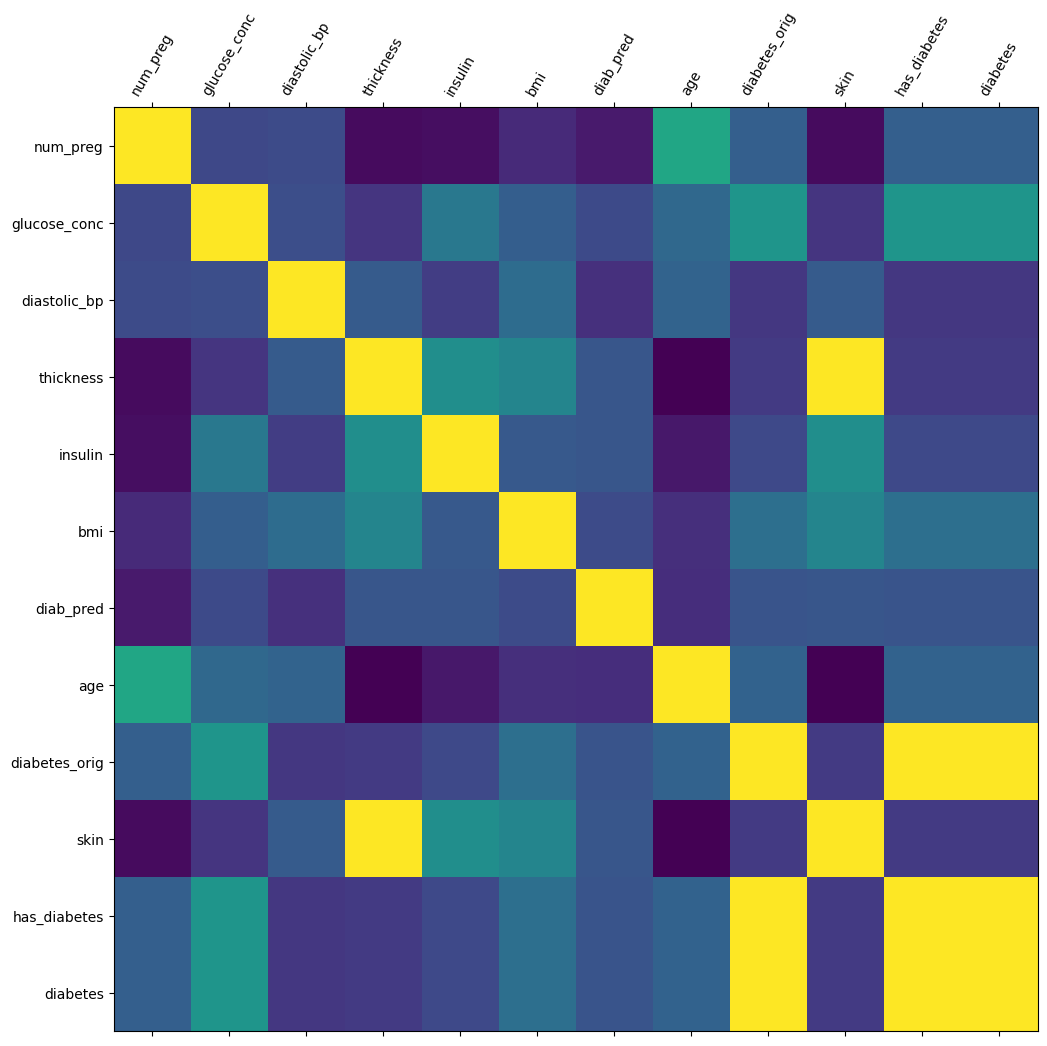

In [7]:
corr = df.corr()
fig,ax= plt.subplots(figsize=(12,12))
ax.matshow(corr) 
plt.xticks(range(len(corr.columns)),corr.columns,rotation=60)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()


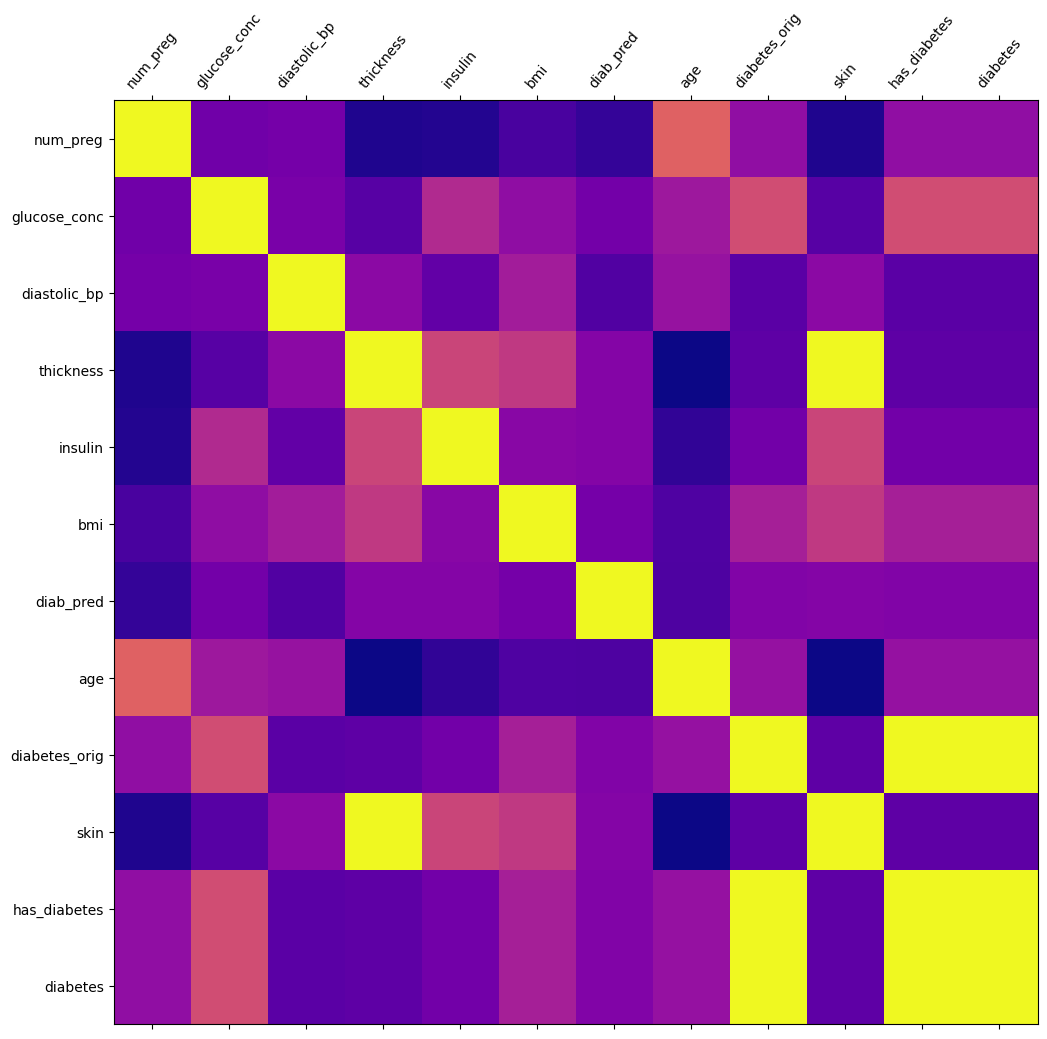

In [8]:
corr = df.corr()
fig,ax= plt.subplots(figsize=(12,12))
cmap = 'plasma'
ax.matshow(corr,cmap=cmap) 
plt.xticks(range(len(corr.columns)),corr.columns,rotation=50)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()


# thickness is corelated with skin
# has_diabetes is corelated with diabetes_origin
# diabetes corelated with diabetes_origin

In [9]:
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)

In [10]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,False
764,2,122,70,0,36.8,0.340,27,1.0638,False
765,5,121,72,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,30.1,0.349,47,0.0000,True


# c check any text data is available or not if available modify with integer values

In [11]:
dict1 = {
    'diabetes':[True,False]
    
}
# Inplace of True place with 1 and in place of False place with 0
dict2 = {
    'diabetes':[1,0]    
}

df.replace(dict1,dict2,inplace=True)


In [12]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,0
764,2,122,70,0,36.8,0.340,27,1.0638,0
765,5,121,72,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,30.1,0.349,47,0.0000,1


# CHECK THE DATA IS BALANCED OR NOT 

In [13]:
num_true = len(df.loc[df['diabetes']==1])
num_false = len(df.loc[df['diabetes'] == 0])

print(f'num_true = {num_true}')
print(f'num_false = {num_false}')

per_num_true = (num_true / (num_true+num_false))*100
print(per_num_true)

per_num_false = (num_false/(num_false+num_true))*100
print(per_num_false)


num_true = 268
num_false = 500
34.89583333333333
65.10416666666666


In [14]:
# pip install scikit-learn

In [15]:
from sklearn.model_selection import train_test_split

input_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin']
output_columns = ['diabetes']

x = df[input_columns].values
y = df[output_columns].values

spilt_test_size = 0.30

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = spilt_test_size,random_state=42)


In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


In [17]:
print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in training set'.format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in training set


In [18]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [19]:

total_num_preg = len(df.loc[df['num_preg']== 0])
print(f'number of Rows missing in num_preg column is {total_num_preg}')


total_glucose_conc =  len(df.loc[df['glucose_conc']==0])
print(f'number of Rows missing in glucose_conc column is {total_glucose_conc}')

total_diastolic_bp = len(df.loc[df['diastolic_bp']==0])
print(f'number of Rows missing in diastolic_bp column is {total_diastolic_bp}')

total_insulin = len(df.loc[df['insulin']==0])
print(f'number of Rows missing in insulin column is {total_insulin}')

total_bmi = len(df.loc[df['bmi']==0])
print(f'number of Rows missing in bmi column is {total_bmi}')

total_diab_pred = len(df.loc[df['diab_pred']==0])
print(f'number of Rows missing in diab_pred column is {total_diab_pred}')

total_age = len(df.loc[df['age'] ==0])
print(f'number of rows missing in age is {total_age}')


number of Rows missing in num_preg column is 111
number of Rows missing in glucose_conc column is 5
number of Rows missing in diastolic_bp column is 35
number of Rows missing in insulin column is 374
number of Rows missing in bmi column is 11
number of Rows missing in diab_pred column is 0
number of rows missing in age is 0


In [20]:
from sklearn.impute import SimpleImputer

fill_zeros = SimpleImputer(missing_values=0,strategy='mean')

x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)


# train the model using naive bayees algorithm

In [21]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()   #creating object for GaussianNB Class

nb_model.fit(x_train,y_train.ravel())   # Training a model


GaussianNB()

In [22]:
from sklearn import metrics

nb_predict_model = nb_model.predict(x_train)   

print(f'Predicted accuracy {metrics.accuracy_score(y_train,nb_predict_model)}') 


Predicted accuracy 0.7541899441340782


In [23]:


nb_predict_test = nb_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,nb_predict_test) }')


Predicted accuracy 0.7359307359307359


In [24]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,nb_predict_test)}")

confusion matrix
[[118  33]
 [ 28  52]]


In [25]:
print("classification report")
print(metrics.classification_report(y_test,nb_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)  # creating object for RandomForestClassifier class

rf_model.fit(x_train,y_train.ravel())   # Training a machine


RandomForestClassifier(random_state=42)

In [27]:
from sklearn import metrics

rf_predict_model = rf_model.predict(x_train)    # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,rf_predict_model) }')  # Accuracy


Predicted accuracy 1.0


In [28]:

rf_predict_test = rf_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,rf_predict_test) }')

Predicted accuracy 0.7532467532467533


In [29]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,rf_predict_test)}")

confusion matrix
[[120  31]
 [ 26  54]]


In [30]:
print("classification report")
print(metrics.classification_report(y_test,rf_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [32]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train,y_train.ravel())

KNeighborsClassifier()

In [34]:
from sklearn import metrics
kn_predict_model = k_neighbor.predict(x_train)    # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,kn_predict_model) }')  #

Predicted accuracy 0.8044692737430168


In [33]:
x_pred = k_neighbor.predict(x_test)

print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)}')

print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')


Accuracy = 0.7359307359307359
Confusion matrix = 
 [[119  32]
 [ 29  51]]


# conclusion : by comparing naive bayees ,random forest, knn algorithems random forest is giving high
# accuracy so we will prefer random forest for predicting diabetes

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   0.90726993]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
   0.53090156]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
  -1.28821221]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
   0.15453319]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
  -1.28821221]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
   0.65635768]]


In [37]:
rf_model_test = rf_model.predict(x_test)    # Testing a model


# input_data = [8,183,64,0,23.3,0.672,32,0.0000]
input_data = [1,89,66,94,28.1,0.167,21,0.9062]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

rf_model_test = rf_model.predict(std_data)
print(rf_model_test)


[[-0.84488505 -0.99820778 -0.16054575  0.12330164 -0.49404308 -0.92076261
  -1.04154944  0.15453319]]
[0]
